In [1]:
from FLAI import data
from FLAI import causal_graph

In [2]:
import pandas as pd
df = pd.read_pickle('Data/titanic.pickle')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
flai_dataset = data.Data(df, transform=True)

In [4]:
flai_dataset.data.head(5)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,108,1,2,1,523,146,3
1,1,1,190,0,2,1,596,81,1
2,1,3,353,0,1,1,669,146,3
3,1,1,272,0,2,1,49,55,3
4,0,3,15,1,1,1,472,146,3


In [5]:
flai_dataset.data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,108,1,2,1,523,146,3
1,1,1,190,0,2,1,596,81,1
2,1,3,353,0,1,1,669,146,3
3,1,1,272,0,2,1,49,55,3
4,0,3,15,1,1,1,472,146,3
...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,1,1,101,146,3
887,1,1,303,0,1,1,14,30,3
888,0,3,413,0,2,3,675,146,3
889,1,1,81,1,1,1,8,60,1


In [6]:
flai_graph = causal_graph.CausalGraph(flai_dataset)

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [7]:
flai_graph.graph['model_edges']

[('Pclass', 'Embarked'),
 ('Pclass', 'Survived'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Sex')]

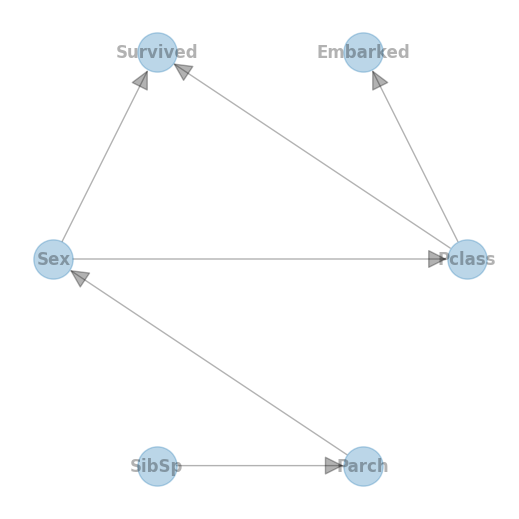

In [8]:
flai_graph.plot()

In [9]:
flai_graph.learn_cpd()

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. DataFrame issues (?)


In [131]:
flai_graph.graph['model_edges']

[('Pclass', 'Survived'),
 ('Pclass', 'Embarked'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Sex')]

In [132]:
CPDs = flai_graph.get_CPDs()

In [133]:
CPDs['Survived']

,Survived,Pclass,Sex,p
0,0,0,0,0.331202
1,0,0,1,0.555427
2,0,1,0,0.368132
3,0,1,1,0.634709
4,0,2,0,0.500000
5,0,2,1,0.746269
6,1,0,0,0.668798
7,1,0,1,0.444573
8,1,1,0,0.631868
9,1,1,1,0.365291


In [134]:
flai_graph.graph['model'].query(variables=['Survived'], evidence={'Pclass':3,
                                'Embarked':1,
                                'Sex':1,
                                'SibSp':5,
                                'Parch':2})

AttributeError: 'BayesianNetwork' object has no attribute 'query'

In [ ]:
from pgmpy.inference import CausalInference
infer = CausalInference(flai_graph.graph['model'],flai_graph.flai_dataset.data.columns)
q = infer.query(variables=['Survived'], evidence={'Pclass':3,
                                'Embarked':1,
                                'Sex':1,
                                'SibSp':5,
                                'Parch':2})

In [ ]:
q.values

array([0.74626866, 0.25373134])

In [ ]:
q.scope()

['Survived']

In [ ]:
infer.query(variables=['Survived'], do={
                                'Sex':1}).values

  0%|          | 0/4 [00:00<?, ?it/s]

array([0.66666667, 0.33333333])

In [ ]:
infer.query(variables=['Survived'], do={
                                'Sex':0}).values

  0%|          | 0/4 [00:00<?, ?it/s]

array([0.40663391, 0.59336609])

In [ ]:
infer.query(variables=['Survived'], evidence={
                                'Sex':0}).values

array([0.40663391, 0.59336609])

In [ ]:
infer.query(variables=['Survived'], evidence={
                                'Sex':1}).values

array([0.66666667, 0.33333333])

In [142]:
flai_dataset.data[(flai_dataset.data.Sex == 0)].shape[0] / flai_dataset.data.shape[0]

0.35241301907968575

In [ ]:
import bnlearn as bn
bn.inference.fit(flai_graph.graph, variables=['Survived'], evidence={'Pclass':3,
                                                          'Embarked':1,
                                                          'Sex':1,
                                                          'SibSp':5,
                                                          'Parch':2})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+------------+----------+
|    |   Survived |        p |
+====+============+==========+
|  0 |          0 | 0.746269 |
+----+------------+----------+
|  1 |          1 | 0.253731 |
+----+------------+----------+


<DiscreteFactor representing phi(Survived:2) at 0x7f5805e1f400>

In [ ]:
infer.query(variables=['Survived'], evidence={'Pclass':3,
                                'Embarked':1,
                                'Sex':1,
                                'SibSp':5,
                                'Parch':2}).values

array([0.74626866, 0.25373134])

In [108]:
infer.query(variables=['Survived'], do={'Pclass':3,
                                'Embarked':1,
                                'Sex':1,
                                'SibSp':5,
                                'Parch':2}).values

  0%|          | 0/144 [00:00<?, ?it/s]

array([0.55473295, 0.44526705])

In [116]:
infer.query(variables=['Survived'], do={'Pclass':3,
                                'Embarked':1,
                                'Sex':1,
                                'SibSp':5,
                                'Parch':2}, evidence={
                                'Sex':1}, inference_algo='ve').values

  0%|          | 0/72 [00:00<?, ?it/s]

array([0.66666667, 0.33333333])

In [129]:
infer.query( variables=['Survived'],do={'Sex':1}).values

  0%|          | 0/4 [00:00<?, ?it/s]

array([0.66666667, 0.33333333])

In [144]:
infer.query(variables=['Sex'],evidence={'Survived' : 0}).values

array([0.31553861, 0.68446139])